# Лабораторная работа 5. Деревья решений

## Импорт необходимых библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt, ceil, log2
from collections import Counter

## Загрузка данных

In [3]:
data = pd.read_csv("agaricus-lepiota.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

Согласно описанию датасета, первые 23 столбца:

0. class (e/p)  
1. cap-shape  
2. cap-surface  
3. cap-color  
4. bruises  
5. odor  
6. gill-attachment  
7. gill-spacing  
8. gill-size  
9. gill-color  
10. stalk-shape  
11. stalk-root  
12. stalk-surface-above-ring  
13. stalk-surface-below-ring  
14. stalk-color-above-ring  
15. stalk-color-below-ring  
16. veil-type  
17. veil-color  
18. ring-number  
19. ring-type  
20. spore-print-color  
21. population  
22. habitat

Поэтому переименуем колонки

In [6]:
column_names = [
    "class",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

data.columns = column_names
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Распределение классов

**e** - edible (съедобный)

**p** - poisonous (ядовитый)


In [7]:
data["class"].value_counts()

,count
class,
e,4208
p,3916


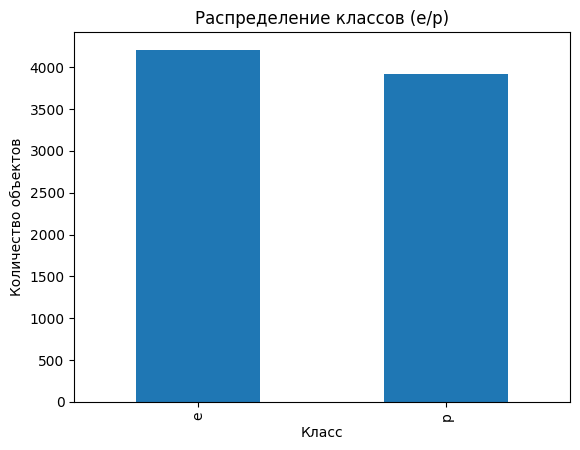

In [8]:
data["class"].value_counts().plot(kind="bar", title="Распределение классов (e/p)")
plt.xlabel("Класс")
plt.ylabel("Количество объектов")
plt.show()

## Подготовка данных для построения дерева

Переведем целевой класс в 0 и 1:

0 — съедобный гриб (**e**)

1 — ядовитый гриб (**p**)

Все остальные признаки категориальные

In [9]:
data["target"] = data["class"].map({"e": 0, "p": 1})
data = data.drop(columns=["class"])
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


In [10]:
# пропуски после преобразований
data.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


## Отбор случайных признаков

Всего признаков без target в датасете - 22  

Тогда sqrt(22) ≈ 4,69, возьмем ceil(sqrt(22)) = 5 признаков


In [11]:
feature_cols = data.columns.drop("target")
n_features = len(feature_cols)
n_features

22

In [12]:
np.random.seed(42)
n_selected = ceil(sqrt(n_features))
selected_features = np.random.choice(feature_cols, size=n_selected, replace=False)

print("Всего признаков:", n_features)
print("Число выбранных признаков (ceil(sqrt(n))):", n_selected)
print("Случайно выбранные признаки:")
selected_features

Всего признаков: 22
Число выбранных признаков (ceil(sqrt(n))): 5
Случайно выбранные признаки:


array(['cap-shape', 'stalk-color-above-ring', 'gill-color', 'cap-surface',
       'veil-type'], dtype=object)

In [13]:
X = data[selected_features].copy()
y = data["target"].values
X.head()

,cap-shape,stalk-color-above-ring,gill-color,cap-surface,veil-type
0,x,w,k,s,p
1,x,w,k,s,p
2,b,w,n,s,p
3,x,w,n,y,p
4,x,w,k,s,p


## Разделение на обучающую и тестовую выборки

In [14]:
def train_test_split_custom(X: pd.DataFrame, y: np.ndarray, test_size: float = 0.2, seed: int = 43):
    np.random.seed(seed)
    n = len(X)
    indices = np.random.permutation(n)
    test_count = int(n * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    X_train = X.iloc[train_idx].reset_index(drop=True)
    X_test = X.iloc[test_idx].reset_index(drop=True)
    y_train = y[train_idx]
    y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, seed=43)
X_train.shape, X_test.shape

((6500, 5), (1624, 5))

## Дерево решений

In [15]:
def entropy(y: np.ndarray) -> float:
    if len(y) == 0:
        return 0.0
    values, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum([p * log2(p) for p in probs if p > 0])


def information_gain(X_col: np.ndarray, y: np.ndarray) -> float:
    parent_entropy = entropy(y)
    values, counts = np.unique(X_col, return_counts=True)
    n = len(y)

    weighted_entropy = 0.0
    for v, cnt in zip(values, counts):
        mask = (X_col == v)
        y_subset = y[mask]
        weighted_entropy += (cnt / n) * entropy(y_subset)

    return parent_entropy - weighted_entropy

In [18]:
class DecisionTreeNode:
    def __init__(self, feature=None, children=None, is_leaf=False, prediction=None, proba=None):
        """
        feature   : имя признака, по которому ветвится этот узел
        children  : словарь {значение признака -> дочерний узел}
        is_leaf   : флаг, является ли узел листом
        prediction: предсказанный класс (0/1) в этом узле
        proba     : вероятность класса 1 (ядовитый) в этом узле
        """
        self.feature = feature
        self.children = children if children is not None else {}
        self.is_leaf = is_leaf
        self.prediction = prediction
        self.proba = proba


class DecisionTreeClassifierCustom:
    def __init__(self, max_depth=None, min_samples_split=2):
        """
        max_depth         : максимальная глубина дерева
        min_samples_split : минимальное число объектов для дальнейшего разбиения
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X: pd.DataFrame, y: np.ndarray):
        features = list(X.columns)
        self.root = self._build_tree(X, y, features, depth=0)

    def _build_tree(self, X: pd.DataFrame, y: np.ndarray, features, depth: int):
        counts = Counter(y)
        total = len(y)
        if total == 0:
            return None

        majority_class = max(counts.items(), key=lambda kv: kv[1])[0]
        proba_pos = counts.get(1, 0) / total

        if len(counts) == 1:
            return DecisionTreeNode(is_leaf=True, prediction=majority_class, proba=proba_pos)

        if not features:
            return DecisionTreeNode(is_leaf=True, prediction=majority_class, proba=proba_pos)

        if self.max_depth is not None and depth >= self.max_depth:
            return DecisionTreeNode(is_leaf=True, prediction=majority_class, proba=proba_pos)

        if total < self.min_samples_split:
            return DecisionTreeNode(is_leaf=True, prediction=majority_class, proba=proba_pos)

        best_feature = None
        best_gain = -1.0
        for feature in features:
            gain = information_gain(X[feature].values, y)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature

        if best_feature is None or best_gain <= 0:
            return DecisionTreeNode(is_leaf=True, prediction=majority_class, proba=proba_pos)

        node = DecisionTreeNode(
            feature=best_feature,
            is_leaf=False,
            prediction=majority_class,
            proba=proba_pos,
            children={}
        )

        remaining_features = [f for f in features if f != best_feature]
        values = X[best_feature].unique()

        for v in values:
            mask = (X[best_feature] == v)
            X_subset = X.loc[mask, :]
            y_subset = y[mask]
            child = self._build_tree(X_subset, y_subset, remaining_features, depth + 1)
            if child is None:
                child = DecisionTreeNode(is_leaf=True, prediction=majority_class, proba=proba_pos)
            node.children[v] = child

        return node

    def _predict_one(self, row: pd.Series, return_proba: bool = False):
        node = self.root
        while not node.is_leaf:
            feature = node.feature
            value = row[feature]
            if value in node.children:
                node = node.children[value]
            else:
                break
        if return_proba:
            return node.proba
        else:
            return node.prediction

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        preds = []
        for _, row in X.iterrows():
            preds.append(self._predict_one(row, return_proba=False))
        return np.array(preds)

    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        probs = []
        for _, row in X.iterrows():
            probs.append(self._predict_one(row, return_proba=True))
        return np.array(probs)

## Обучение дерева решений и предсказание на тесте


In [19]:
tree = DecisionTreeClassifierCustom(
    max_depth=None,
    min_samples_split=2
)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_pred[:10], y_test[:10]

(array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0]), array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0]))

## Оценка качества на тестовой выборке

In [20]:
def confusion_matrix_binary(y_true: np.ndarray, y_pred: np.ndarray):
    cm = np.zeros((2, 2), dtype=int)
    for yt, yp in zip(y_true, y_pred):
        yt_i = int(yt)
        yp_i = int(yp)
        cm[yt_i, yp_i] += 1
    return cm

cm = confusion_matrix_binary(y_test, y_pred)
cm

array([[787,  50],
       [138, 649]])

In [21]:
TN, FP = cm[0, 0], cm[0, 1]
FN, TP = cm[1, 0], cm[1, 1]

print("TN (true negative) :", TN)
print("FP (false positive):", FP)
print("FN (false negative):", FN)
print("TP (true positive) :", TP)

TN (true negative) : 787
FP (false positive): 50
FN (false negative): 138
TP (true positive) : 649


In [22]:
def accuracy_score_manual(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(y_true == y_pred)


def precision_recall_from_cm(cm: np.ndarray):
    TN, FP = cm[0, 0], cm[0, 1]
    FN, TP = cm[1, 0], cm[1, 1]
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    return precision, recall

acc = accuracy_score_manual(y_test, y_pred)
prec, rec = precision_recall_from_cm(cm)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

Accuracy : 0.8842
Precision: 0.9285
Recall   : 0.8247


## ROC-кривая и AUC-ROC

In [23]:
y_proba = tree.predict_proba(X_test)
y_proba[:10]

array([1.        , 0.49152542, 0.49122807, 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.06451613, 0.        ])

In [24]:
def roc_curve_manual(y_true: np.ndarray, y_proba: np.ndarray, num_thresholds: int = 100):
    thresholds = np.linspace(0, 1, num_thresholds)
    tprs = []
    fprs = []

    for thr in thresholds:
        y_pred_thr = (y_proba >= thr).astype(int)
        cm = confusion_matrix_binary(y_true, y_pred_thr)
        TN, FP = cm[0, 0], cm[0, 1]
        FN, TP = cm[1, 0], cm[1, 1]

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0.0  # True Positive Rate (Recall)
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0.0  # False Positive Rate

        tprs.append(tpr)
        fprs.append(fpr)

    fprs = np.array(fprs)
    tprs = np.array(tprs)
    sorted_idx = np.argsort(fprs)
    return fprs[sorted_idx], tprs[sorted_idx], thresholds[sorted_idx]


def auc_trapezoid(x: np.ndarray, y: np.ndarray) -> float:
    return np.trapz(y, x)

In [25]:
fpr, tpr, thr_roc = roc_curve_manual(y_test, y_proba, num_thresholds=200)
auc_roc = auc_trapezoid(fpr, tpr)
auc_roc

/tmp/ipython-input-2421959474.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


np.float64(0.9669024272869008)

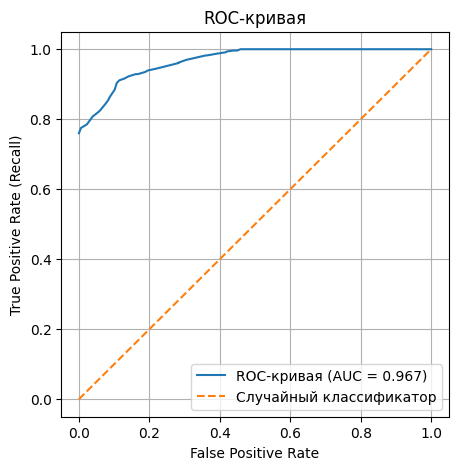

In [26]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f"ROC-кривая (AUC = {auc_roc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Случайный классификатор")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-кривая")
plt.legend()
plt.grid(True)
plt.show()

## PR и AUC-PR

In [27]:
def pr_curve_manual(y_true: np.ndarray, y_proba: np.ndarray, num_thresholds: int = 100):
    thresholds = np.linspace(0, 1, num_thresholds)
    precisions = []
    recalls = []

    for thr in thresholds:
        y_pred_thr = (y_proba >= thr).astype(int)
        cm = confusion_matrix_binary(y_true, y_pred_thr)
        precision, recall = precision_recall_from_cm(cm)
        precisions.append(precision)
        recalls.append(recall)

    precisions = np.array(precisions)
    recalls = np.array(recalls)
    sorted_idx = np.argsort(recalls)
    return recalls[sorted_idx], precisions[sorted_idx], thresholds[sorted_idx]

In [28]:
recall_vals, precision_vals, thr_pr = pr_curve_manual(y_test, y_proba, num_thresholds=200)
auc_pr = auc_trapezoid(recall_vals, precision_vals)
auc_pr

/tmp/ipython-input-2421959474.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


np.float64(0.20977710146677953)

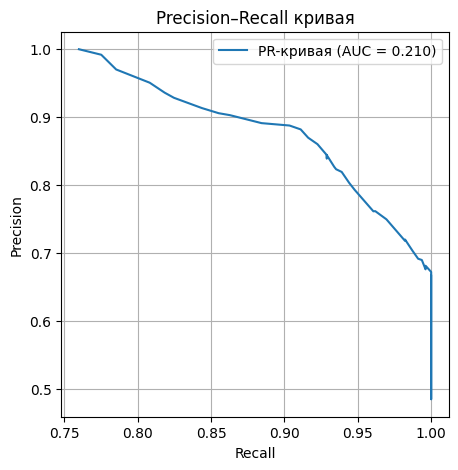

In [29]:
plt.figure(figsize=(5, 5))
plt.plot(recall_vals, precision_vals, label=f"PR-кривая (AUC = {auc_pr:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall кривая")
plt.grid(True)
plt.legend()
plt.show()